<a href="https://colab.research.google.com/github/koleshjr/Fruit_Classifier_Project/blob/main/Inference_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FRUIT CLASSIFICATION APP

##### Pip install all necessary requirements


In [2]:
!pip install -q fastai
!pip install -U albumentations
!pip install opencv-python==4.5.4.60
!pip install timm==0.6.2.dev0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 2.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.9/497.9 KB 8.9 MB/s eta 0:00:00


##### setup your path

In [3]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Fruit_Project/'

Mounted at /content/gdrive


##### Import all the necessary libraries

In [4]:

from fastai.vision.all import * # same as tensorflow, pytorch
# import pathlib
# from PIL import Image
import albumentations #augmentations
from albumentations.pytorch import ToTensorV2
import timm # transformers

##### This class helps fastai to support albumentation augmentation out of the box

In [5]:
class AlbumentationsTransform (RandTransform):
    split_idx,order=None,2
    def __init__(self, train_aug, valid_aug): store_attr()
    
    def before_call(self, b, split_idx):
        self.idx = split_idx
    
    def encodes(self, img: PILImage):
        if self.idx == 0:
            aug_img = self.train_aug(image=np.array(img))['image']
        else:
            aug_img = self.valid_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

In [8]:
learn = load_learner(path + 'fruit_model_v2.pkl')

labels = learn.dls.vocab
def read_image(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    img=mpimg.imread(image)
    plt.imshow(img)
    plt.show()



def predict(img):

  pred,pred_idx,probs = learn.predict(img)

  return {labels[i]: float(probs[i]) for i in range(len(labels))}


def get_prediction_class(img):

  pred,pred_idx,probs = learn.predict(img)

  max_prob = 0

  for i in range(len(probs)):

    if(probs[i]>max_prob):

      max_prob = probs[i]

      max_idx = i
  
  read_image(img)

  print(f'The predicted class is: {labels[max_idx]} with a probability of {max_prob}') 

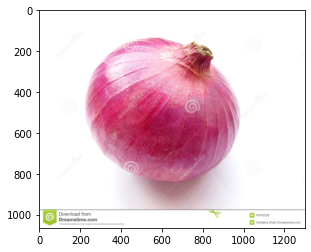

The predicted class is: Onion White with a probability of 0.9927709698677063


In [9]:
get_prediction_class('/content/gdrive/MyDrive/Fruit_Project/Onion.jpg')